In [2]:
import sys
import os
import numpy as np
from numpy import linalg as LA
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
import glob as glob
import SolverCQWs as solver
from IPython.display import display, Math
from tabulate import tabulate
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset
plt.style.use('/media/labfiles/lab-codes/plot-styles/plotstyle.mplstyle')


Total layer number: 5


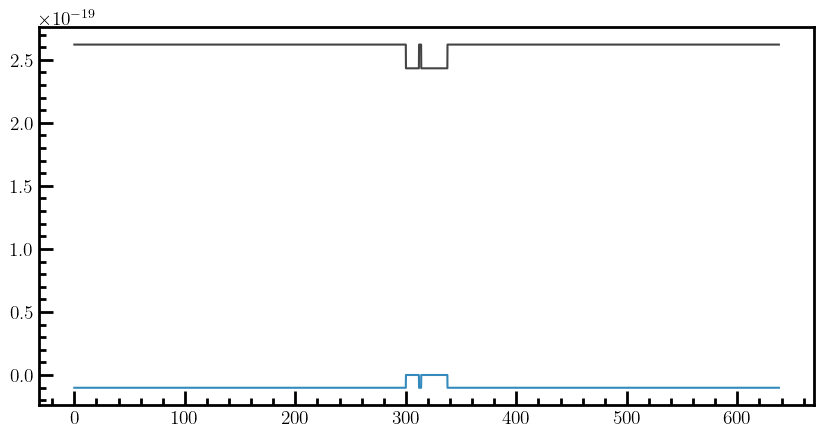

CPU times: user 424 ms, sys: 123 µs, total: 424 ms
Wall time: 420 ms


In [5]:
%%time

class Structure(object): pass
s = Structure() # this will be our datastructure
# TEMPERATURE
s.T = 19#Kelvin
# Binding Energy
s.HHBinding =6.1e-3 #meV
s.LHBinding =6.8e-3 #meV
# Band Offset ratios
s.Qc = 0.65
s.Qv = 0.35

# Total subband number to be calculated for electrons
s.subbands = 5
# APPLIED ELECTRIC FIELD
s.Fapp = 0e4 # (V/m)

# For 1D, z-axis is choosen
s.gridfactor = 0.05#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s.material =[

             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [23.74,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

structure = s
nm = 1e-9
# RUN SIMULATION
model = solver.StructureFrom(structure) #

xaxis=model.xaxis/nm
cb=model.cb
vb=model.vb
plt.plot(model.xaxis/1e-9,model.cb)
plt.plot(model.xaxis/1e-9,model.vb)
plt.show()

In [10]:
class edge:
    def __init__(self,xaxis,cb,vb,**kwargs):
        self.cb =cb
        self.vb =vb
        self.xaxis = xaxis
    
    def plots(self,**kwargs):
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        fig.subplots_adjust(hspace=0.05)  
        # plot the same data on both axes
        ax1.plot(self.xaxis,self.cb)
        ax2.plot(pts)
        # zoom-in / limit the view to different portions of the data
        ax1.set_ylim(.78, 1.)  # outliers only
        ax2.set_ylim(0, .22)  # most of the data

        # hide the spines between ax and ax2
        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_visible(False)
        ax1.xaxis.tick_top()
        ax1.tick_params(labeltop=False)  # don't put tick labels at the top
        ax2.xaxis.tick_bottom()

        # Now, let's turn towards the cut-out slanted lines.
        # We create line objects in axes coordinates, in which (0,0), (0,1),
        # (1,0), and (1,1) are the four corners of the axes.
        # The slanted lines themselves are markers at those locations, such that the
        # lines keep their angle and position, independent of the axes size or scale
        # Finally, we need to disable clipping.

        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                      linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


        plt.show()



In [ ]:
edge